In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!gdown 1-hISmbzmhuJaySCv4g0fn95pU1G9GtWa

Downloading...
From: https://drive.google.com/uc?id=1-hISmbzmhuJaySCv4g0fn95pU1G9GtWa
To: /content/test_data_1.jpg
100% 835k/835k [00:00<00:00, 67.6MB/s]


In [52]:
!pip install -q easyocr
!pip install -q pandas

# Use EasyOCR to extract text

In [4]:
import easyocr

def ocr_image(image_path):
    reader = easyocr.Reader(["en"])
    result = reader.readtext(image_path)
    return result

['CAC MAT HANG Vhut', 'PuLULUL', 'BAN: DO CHAY BIA NUOC NGOT', '816 805', '8865 712 70', 'XUAN', 'THANH PHO DONG XOAI', "DT:' 0328", 'Wic', 'D', '2 - KUAN LOC', 'PHUONG TAN', '{er iger', 'COSy', 'DIeM !', 'Wd', '4j', 'RINH XE Ve NHA', 'KhanG di#H', 'GCLTReng', '~eRUtuRE', 'LAELA', "'WW-", 'Lamaeh WW=', 'Dlnn Heneken', 'BIA W', 'Heineken', 'BIA VIET', 'BIA VIET', 'Tger', 'BIAV', 'Heineken', 'BIA VIET', 'BIAE', 'Chdine', 'Heineken', 'BIAVIET', 'Tiger ', 'BIAV', 'Banc', 'Tiger', 'Tiger', 'BIAVIET', 'Chpune', 'ChQLE', 'Heineken', 'BIA VIET', 'BIA', 'T8e=', 'Tger |Heineken', 'Ho', 'BIAVI', 'B,Nc', 'Tiger_', 'Tiger', 'BIAVIET', 'G', 'Quuc', 'BIA VIET', 'Totr', 'Guolpack"', 'Heineken', 'Mo ', 'BAn', 'BIA VIET', 'QubL', 'CNM', 'BIA VIET', 'BIA VIET', 'MUi', "Tiger'", "Tiger'", 'Goolpacit', 'Heineken', '350,000', 'BAN ', 'BIA VIET', '(Loduna', 'cuplne:_', 'BIA VIET', 'BIA VIET', 'MoI=', 'Tiger P', 'Tiger', 'Goolpach=', 'BAn_', 'Heineken]', 'BaMo)', 'BIRVIET', 'ChcR,', 'BIA VIET', 'BIAVIET', 'Ho

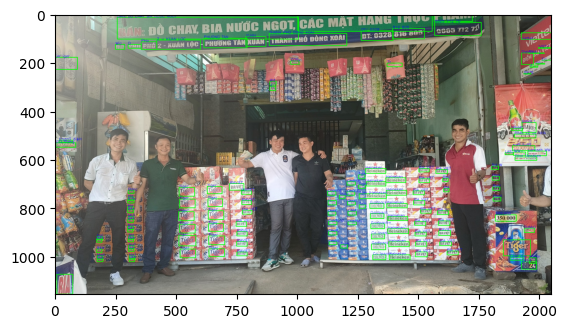

In [5]:
import cv2
from matplotlib import pyplot as plt

img_path = "/content/test_data_1.jpg"
mat = cv2.imread(img_path)
result = ocr_image(img_path)


boxes = [line[0] for line in result]
texts = [line[1] for line in result]
scores = [line[2] for line in result]

for box, text in zip(boxes, texts):
    top_left     = (int(box[0][0]), int(box[0][1]))
    bottom_right = (int(box[2][0]), int(box[2][1]))

    cv2.rectangle(mat, top_left, bottom_right, (0, 255, 0), 2)
    cv2.putText(mat, text, top_left, cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 1)

mat = cv2.cvtColor(mat, cv2.COLOR_BGR2RGB)
print(texts)
plt.imshow(mat)

YOLO Count People

In [6]:
!pip install torch torchvision torchaudio
!pip install yolov5


In [48]:
import torch
from pathlib import Path
import cv2
import matplotlib.pyplot as plt

# Load YOLOv5 model
model = torch.hub.load('ultralytics/yolov5', 'custom', path='your_model_yolov5.pt')

# Load image
img_path = '/content/test_data_1.jpg'
img = cv2.imread(img_path)

# Perform inference
results = model(img)

# Print results
results.print()  # or results.show() to display image with detections

# To show the image with bounding boxes
results.show()

# Alternatively, you can save the results
results.save(save_dir=Path('path/to/save/results'))

# If you need the detected results as a DataFrame
df = results.pandas().xyxy[0]  # bounding box coordinates, confidence, class, name
print(df)

filtered_df = df[df['confidence'] > 0.6]

# Create a summary DataFrame with class name, quantity, and average confidence
summary_df = filtered_df.groupby('name').agg(
    quantity=('name', 'size'),
    confidence=('confidence', 'mean')
).reset_index()

# Print the summary DataFrame
print(summary_df)

drinker = 0
if (summary_df[summary_df['name'] == 'customer'].shape[0] > 0 and
    summary_df[summary_df['name'] == 'beer_bottle'].shape[0] > 0 and
    summary_df[summary_df['name'] == 'heineken_logo'].shape[0] > 0):
    drinker = summary_df[summary_df['name'] == 'customer']['quantity'].values[0]

print(drinker)

# Save the summary to a CSV file
output_csv_path = '/content/summary_results.csv'
summary_df.to_csv(output_csv_path, index=False)
print(f"Summary saved to {output_csv_path}")



Output hidden; open in https://colab.research.google.com to view.

In [9]:
brand_Logos("Heineken")

{'logo_name': 'Heineken'}

# Using image captioning model

In [10]:
import cv2
from transformers import pipeline
from PIL import Image
import numpy as np

# Initialize the image captioning pipeline
pipe = pipeline("image-to-text", model="Salesforce/blip-image-captioning-base")

config.json:   0%|          | 0.00/4.56k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/990M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/506 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/287 [00:00<?, ?B/s]

# Simple streamlit app

In [8]:
!pip install -q streamlit

In [9]:
!npm install localtunnel

npm WARN saveError ENOENT: no such file or directory, open '/content/package.json'
npm WARN enoent ENOENT: no such file or directory, open '/content/package.json'
npm WARN content No description
npm WARN content No repository field.
npm WARN content No README data
npm WARN content No license field.

+ localtunnel@2.0.2
updated 1 package and audited 36 packages in 0.987s

3 packages are looking for funding
  run `npm fund` for details

found 2 moderate severity vulnerabilities
  run `npm audit fix` to fix them, or `npm audit` for details


In [94]:
%%writefile app.py
import streamlit as st
import easyocr
import numpy as np
from PIL import Image
import requests
import json
from transformers import pipeline
from groq import Groq
import torch
from pathlib import Path
import cv2
import matplotlib.pyplot as plt
import pandas as pd

# Initialize the OCR reader
ocr_reader = easyocr.Reader(["en"])

def get_image_caption(image):
    # Use a pre-trained image captioning model from Salesforce
    caption_pipeline = pipeline("image-to-text", model="Salesforce/blip-image-captioning-base")
    return caption_pipeline(image)[0]['generated_text']

def perform_ocr(image):
    result = ocr_reader.readtext(np.array(image))
    ocr_texts = [line[1] for line in result]
    return ocr_texts


# Streamlit app
st.set_page_config(layout="wide")
st.title("Heineken Event Analysis")

st.header("Upload Image")
uploaded_file = st.file_uploader("Choose an image file", type=["jpg", "jpeg", "png"])

# Create three columns with custom widths
col2, col3 = st.columns([2, 2])


with col2:
    st.header("OCR and Description")

    if uploaded_file is not None:

        # Load YOLOv5 model
        model = torch.hub.load('ultralytics/yolov5', 'custom', path='your_model_yolov5.pt')

        # Load image
        file_bytes = np.asarray(bytearray(uploaded_file.read()), dtype=np.uint8)
        img = cv2.imdecode(file_bytes, 1)


        # Perform inference
        results = model(img)

        # To show the image with bounding boxes
        results.render()
        annotated_image = Image.fromarray(results.ims[0])
        st.image(annotated_image, caption='Detected Image')

        # Alternatively, you can save the results
        # results.save(save_dir=Path('path/to/save/results'))

        # If you need the detected results as a DataFrame
        df = results.pandas().xyxy[0]  # bounding box coordinates, confidence, class, name
        # print(df)

        filtered_df = df[df['confidence'] > 0.45]

        # Create a summary DataFrame with class name, quantity, and average confidence
        summary_df = filtered_df.groupby('name').agg(
            quantity=('name', 'size'),
            confidence=('confidence', 'mean')
        ).reset_index()


        # Print the summary DataFrame
        st.table(summary_df[['name', 'quantity']])

        # # Load the image
        # image = Image.open(uploaded_file).convert("RGB")
        # st.image(image, caption='Uploaded Image', use_column_width=True)

        # # Get image caption
        # st.subheader("Image Description")
        # image_description = get_image_caption(image)
        # st.write(image_description)

        # # # Perform OCR
        # # st.subheader("OCR Texts")
        # ocr_texts = perform_ocr(image)
        # # for text in ocr_texts:
        # #     st.write(text)

with col3:
    st.header("Analysis")

    if uploaded_file is not None:
        # Analyze image information
        # ocr_results = ' '.join(ocr_texts)
        # analysis = analyze_image_information(image_description, ocr_results)
        # st.write(analysis)


        # ['beer_bottle', 'beer_keg', 'biaviet_logo', 'billboard', 'bivina_logo', 'bucket',
        #'campain-objects', 'consumer', 'display-stand', 'fridge', 'heineken_logo', 'larue_logo', 'parasol', 'pg_marketer', 'saigon_logo', 'signage', 'staff',
        # 'standee', 'strongbow_logo', 'tent-card', 'tiger_logo']

        drinker = 0
        if (summary_df[summary_df['name'] == 'consumer'].shape[0] > 0 and
            summary_df[summary_df['name'] == 'beer_bottle'].shape[0] > 0 and
            summary_df[summary_df['name'] == 'heineken_logo'].shape[0] > 0):
            drinker = summary_df[summary_df['name'] == 'consumer']['quantity'].values[0]

        promotion_items = []
        if (summary_df[summary_df['name'] == 'bucket'].shape[0] > 0):
          promotion_items.append('bucket')
        if (summary_df[summary_df['name'] == 'campain-objects'].shape[0] > 0):
          promotion_items.append('campain-objects')
        if (summary_df[summary_df['name'] == 'display-stand'].shape[0] > 0):
          promotion_items.append('display-stand')
        if (summary_df[summary_df['name'] == 'fridge'].shape[0] > 0):
          promotion_items.append('fridge')
        if (summary_df[summary_df['name'] == 'parasol'].shape[0] > 0):
          promotion_items.append('parasol')
        if (summary_df[summary_df['name'] == 'signage'].shape[0] > 0):
          promotion_items.append('signage')
        if (summary_df[summary_df['name'] == 'tent-card'].shape[0] > 0):
          promotion_items.append('tent-card')


        #==================
        # Problem 1: Counting Beer Drinkers
        st.markdown("### Counting Beer Drinkers")
        st.write(f"People drinking Heineken beer: {drinker}")

        # Problem 2: Detecting Promotional Materials
        st.markdown("### Detecting Promotional Materials")
        st.write(f"Promotional materials detected: {', '.join(promotion_items)}")

        # Problem 3: Evaluating Event Success
        st.markdown("### Evaluating Event Success")
        customers_count = 50  # Hard-coded for demonstration
        positive_mood_count = 40  # Hard-coded for demonstration
        st.write(f"Total customers detected: {drinker}")
        st.write(f"Emotional: Positive")

        # Problem 4: Monitoring Marketing Staff pg_marketer
        st.markdown("### Monitoring Marketing Staff")
        marketing_staff_count = 0  # Hard-coded for demonstration
        if (summary_df[summary_df['name'] == 'pg_marketer']['quantity'].values.size != 0):
          marketing_staff_count = summary_df[summary_df['name'] == 'pg_marketer']['quantity'].values[0]
        st.write(f"Marketing staff present: {marketing_staff_count}")
        if marketing_staff_count >= 2:
            st.markdown("**Marketing Staff Status**: Sufficient ✔️")
        else:
            st.markdown("**Marketing Staff Status**: Insufficient ❌")

        # Problem 5: Assessing Store Presence standee
        st.markdown("### Assessing Store Presence")
        advertisement_sign_present = 0 # Hard-coded for demonstration
        if (summary_df[summary_df['name'] == 'billboard']['quantity'].values.size != 0):
          advertisement_sign_present = summary_df[summary_df['name'] == 'billboard']['quantity'].values[0]

        refrigerator_present =  0  # Hard-coded for demonstration
        if (summary_df[summary_df['name'] == 'standee']['quantity'].values.size != 0):
          refrigerator_present = summary_df[summary_df['name'] == 'standee']['quantity'].values[0]

        cases_of_beer = 0  # Hard-coded for demonstration
        if (summary_df[summary_df['name'] == 'beer_keg']['quantity'].values.size != 0):
          cases_of_beer = summary_df[summary_df['name'] == 'beer_keg']['quantity'].values[0]

        st.write(f"Advertisement sign with logo present: {'Yes' if advertisement_sign_present else 'No'}")
        st.write(f"Refrigerator with logo present: {'Yes' if refrigerator_present else 'No'}")
        st.write(f"Cases of Heineken beer: {cases_of_beer}")

        if advertisement_sign_present and refrigerator_present and cases_of_beer >= 10:
            st.markdown("**Store Presence Status**: Satisfactory ✔️")
        else:
            st.markdown("**Store Presence Status**: Unsatisfactory ❌")



Overwriting app.py


In [95]:
!streamlit run app.py &>/content/logs.txt &

In [26]:
import urllib
print("Password/Enpoint IP for localtunnel is:",urllib.request.urlopen('https://ipv4.icanhazip.com').read().decode('utf8').strip("\n"))

Password/Enpoint IP for localtunnel is: 34.83.43.61


In [ ]:
!npx localtunnel --port 8501

npx: installed 22 in 2.248s
your url is: https://eight-mangos-dress.loca.lt
